# Multivariate time series with LSTM


---
----

---
---
Energy consumption of household appliances: A case study of multivariate time series forecasting

Experimental data used to create regression models for predicting energy consumption of appliances in a low-energy building.



---



---



Information about the dataset:

The dataset contains records of various features every 10 minutes for approximately 4.5 months. The temperature and humidity conditions of the house were monitored using a ZigBee wireless sensor network. Each wireless node transmitted temperature and humidity conditions for about 3.3 minutes. After that, the average of the wireless data was calculated over 10-minute periods. Energy data was recorded every 10 minutes using M-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a publicly available dataset from Reliable Prognosis (rp5.ru), and merged with the experimental datasets using the date and time column. Two random variables were included in the dataset to test regression models and to filter out non-predictive attributes (parameters).

The original source of the dataset : 

https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
___
___

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## DATA

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date', 
                 infer_datetime_format=True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

<Axes: xlabel='date'>

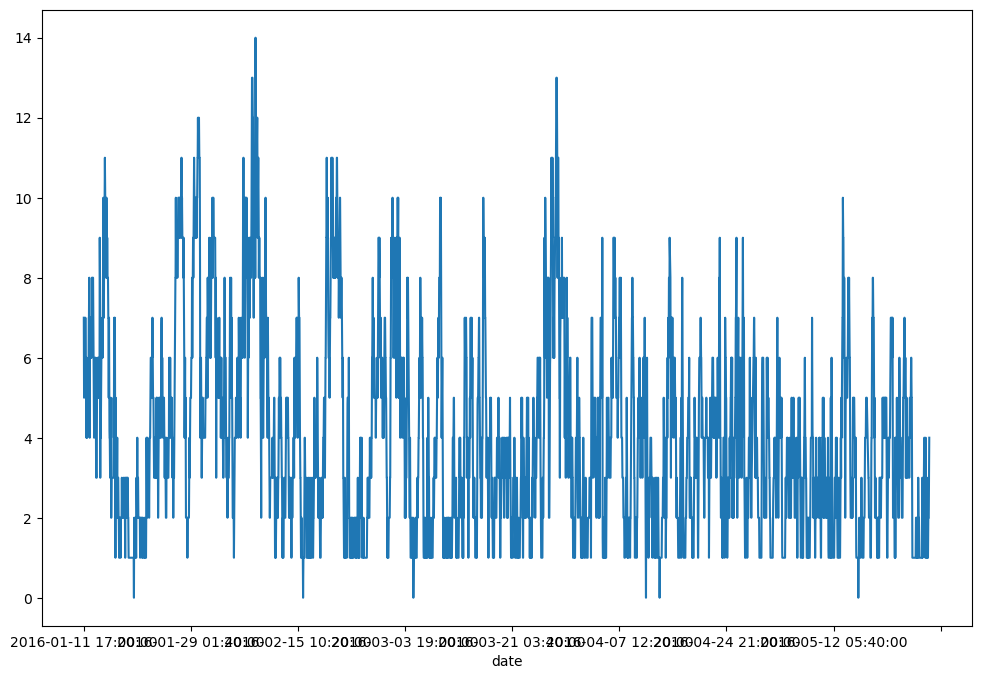

In [5]:
df['Windspeed'].plot(figsize=(12,8))

<Axes: xlabel='date'>

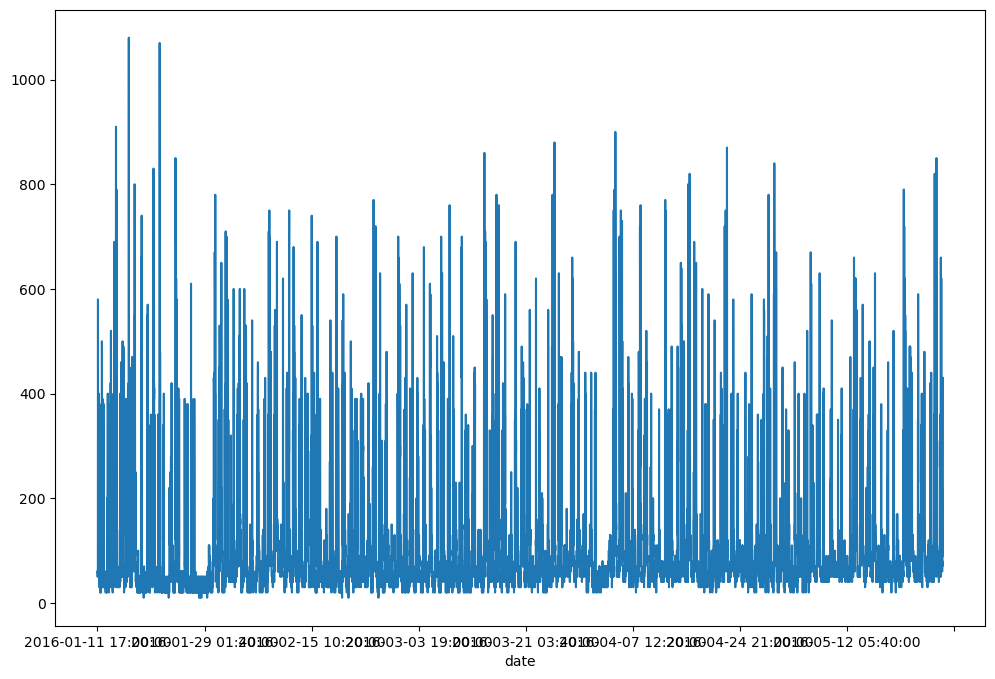

In [6]:
df['Appliances'].plot(figsize=(12,8))

## Train / Test

In [7]:
len(df)

19735

In [8]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [9]:
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


Let's say we only want to predict 24 hours into the future, we don't need 3 months of data for that. So, let's save some training time and select only the data from the last few months.

In [10]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [11]:
df = df.loc['2016-05-01':]

In [12]:
df = df.round(2)

In [13]:
len(df)

3853

In [14]:
# Combien de lignes par jour ? Nous savons que c'est toutes les 10 minutes
24*60/10

144.0

In [15]:
test_days = 2

In [16]:
test_ind = test_days*144

In [17]:
test_ind

288

In [18]:
# Remarquez le signe moins dans notre indexation

train = df.iloc[:-test_ind]
test = df.iloc [-test_ind :]

In [19]:
train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [20]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


## Data scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
# Adapter uniquement aux données d'entraînement, sinon nous trichons en supposant des informations sur les données test
scaler.fit(train)

MinMaxScaler()

In [24]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time series generator

Cette classe examine une série de points de données recueillis à
des intervalles égaux, ainsi que des paramètres de séries temporelles tels stride, length , etc., afin de produire des lots pour
l'entraînement/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
# définir le générateur
length = 144 # Longueur des séquences de sortie (en nombre de pas temporel)
batch_size = 1 # Nombre d'échantillons de séries temporelles dans chaque batch (lot)
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=length, batch_size=batch_size)

In [27]:
len(scaled_train)

3565

In [28]:
len(generator) 

3421

In [29]:
# À quoi ressemble le premier batch ?
X,y = generator[0]

In [30]:
print(f"Compte tenu du tableau suivant : \n {X.flatten()}")
print(f'Cela prédit ce y : \n {y}')

Compte tenu du tableau suivant : 
 [0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Cela prédit ce y : 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


Vous allez maintenant pouvoir modifier la longueur de manière à ce qu'elle ait un sens pour votre série temporelle !

## Creating the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [32]:
scaled_train.shape

(3565, 28)

In [33]:
# définir le modèle
model = Sequential()

# Couche LSTM
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Prédiction finale (un neurone par feature ou caractéristique)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


## EarlyStopping

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [36]:
model.fit(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10
3421/3421 [==============================] - 283s 81ms/step - loss: 0.0111 - val_loss: 0.0094
Epoch 2/10
3421/3421 [==============================] - 275s 80ms/step - loss: 0.0079 - val_loss: 0.0087
Epoch 3/10
3421/3421 [==============================] - 261s 76ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 4/10
3421/3421 [==============================] - 261s 76ms/step - loss: 0.0073 - val_loss: 0.0082
Epoch 5/10
3421/3421 [==============================] - 236s 69ms/step - loss: 0.0073 - val_loss: 0.0082
Epoch 6/10
3421/3421 [==============================] - 229s 67ms/step - loss: 0.0072 - val_loss: 0.0081
Epoch 7/10
3421/3421 [==============================] - 231s 68ms/step - loss: 0.0071 - val_loss: 0.0077
Epoch 8/10
3421/3421 [==============================] - 232s 68ms/step - loss: 0.0071 - val_loss: 0.0078


In [37]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<Axes: >

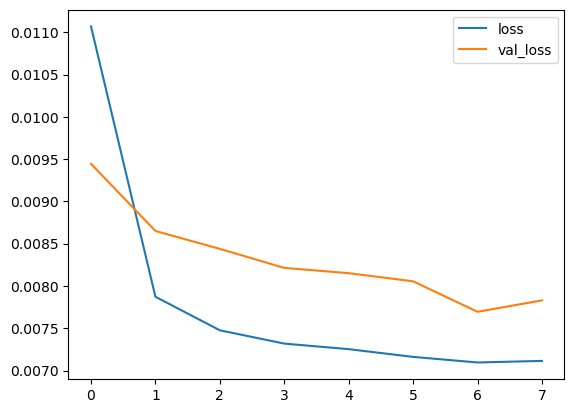

In [38]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluation on the test data

In [39]:
first_eval_batch = scaled_train[-length:]

In [40]:
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [41]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [42]:
model.predict(first_eval_batch)

1/1 [==============================] - 1s 844ms/step


array([[ 0.11932156,  0.03557655,  0.71050584,  0.38485652,  0.54529756,
         0.42263013,  0.4239257 ,  0.41912538,  0.7152829 ,  0.40593606,
         0.30407995,  0.35090655,  0.6451808 , -0.00095171,  0.6129956 ,
         0.38991484,  0.5169101 ,  0.32859552,  0.5287115 ,  0.35515374,
         0.6140807 ,  0.52466524,  0.43262964,  0.20626667,  0.60855544,
         0.5358448 ,  0.47401416,  0.46637973]], dtype=float32)

In [43]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

Now let's put this logic into a for loop to predict the future for the entire test range.

----

In [44]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # obtenir la prédiction avec 1 timestamp d'avance ([0] pour ne saisir que le nombre au lieu de [array])
    current_pred = model.predict(current_batch)[0]
    
    # stocker la prédiction
    test_predictions.append(current_pred) 
    
    # mise à jour du batch pour inclure maintenant la prédiction et supprimer la première valeur
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 54ms/step


In [45]:
test_predictions

[array([ 0.11932156,  0.03557655,  0.71050584,  0.38485652,  0.54529756,
         0.42263013,  0.4239257 ,  0.41912538,  0.7152829 ,  0.40593606,
         0.30407995,  0.35090655,  0.6451808 , -0.00095171,  0.6129956 ,
         0.38991484,  0.5169101 ,  0.32859552,  0.5287115 ,  0.35515374,
         0.6140807 ,  0.52466524,  0.43262964,  0.20626667,  0.60855544,
         0.5358448 ,  0.47401416,  0.46637973], dtype=float32),
 array([0.12153004, 0.05559552, 0.7158698 , 0.3789369 , 0.5477629 ,
        0.41780436, 0.42639846, 0.42094558, 0.70745516, 0.39934027,
        0.30352807, 0.33805427, 0.6212106 , 0.00207697, 0.61132085,
        0.39101654, 0.51813334, 0.3391407 , 0.5188981 , 0.35938415,
        0.6057366 , 0.5294656 , 0.4382622 , 0.2050397 , 0.62109655,
        0.5333501 , 0.47514337, 0.4698394 ], dtype=float32),
 array([0.12128553, 0.06491351, 0.71844625, 0.37558952, 0.5478835 ,
        0.4146369 , 0.42866936, 0.42169386, 0.7008004 , 0.39404002,
        0.30380216, 0.32717946, 0.

In [46]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

## Inverse transformations and comparison

In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

In [48]:
true_predictions

array([[111.87760301,   1.06729656,  24.5606693 , ...,   7.65577717,
         23.69648773,  23.3149952 ],
       [113.57813165,   1.66786551,  24.59215563, ...,   7.61361686,
         23.75291435,  23.48787452],
       [113.38985652,   1.94740534,  24.60727952, ...,   7.55629842,
         23.72803541,  23.47942319],
       ...,
       [-66.70619845,  -6.50388256,  32.09668869, ...,  -5.30009848,
         22.21589721,  23.23710144],
       [-66.70614108,  -6.50388435,  32.09669079, ...,  -5.30009899,
         22.21590316,  23.23710144],
       [-66.70617551,  -6.50388166,  32.0966873 , ...,  -5.3001    ,
         22.21590019,  23.23709846]])

In [49]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [50]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [51]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,111.877603,1.067297,24.560669,37.661283,24.189861,34.673051,25.126829,36.699852,24.206980,37.666831,...,21.955042,37.553285,16.683570,756.062367,56.879853,2.062667,41.513326,7.655777,23.696488,23.314995
1,113.578132,1.667866,24.592156,37.497605,24.220603,34.510761,25.144485,36.734290,24.152186,37.521460,...,21.902050,37.645042,16.479973,756.171816,57.307927,2.050397,42.265793,7.613617,23.752914,23.487875
2,113.389857,1.947405,24.607280,37.405050,24.222107,34.404239,25.160699,36.748448,24.105603,37.404642,...,21.849539,37.755923,16.220768,756.267241,57.801753,2.021314,42.617463,7.556298,23.728035,23.479423
3,112.518919,2.089467,24.620816,37.333246,24.212918,34.341438,25.181420,36.757348,24.072682,37.302850,...,21.805757,37.873934,15.963454,756.366517,58.429924,1.994216,42.843301,7.489566,23.681095,23.468276
4,110.896924,2.149984,24.629607,37.257658,24.190149,34.301961,25.202425,36.759823,24.048007,37.202239,...,21.766361,37.991587,15.689486,756.466311,59.141495,1.967210,42.983062,7.419070,23.640180,23.461089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-66.706198,-6.503882,32.096689,36.946255,18.129159,51.244223,22.638658,-7.113298,31.375471,49.698704,...,27.942107,65.637693,-20.161262,755.976743,178.896289,13.352679,-15.909058,-5.300104,22.215903,23.237101
284,-66.706244,-6.503883,32.096690,36.946259,18.129160,51.244233,22.638659,-7.113289,31.375471,49.698710,...,27.942107,65.637701,-20.161262,755.976744,178.896307,13.352678,-15.909062,-5.300102,22.215900,23.237104
285,-66.706198,-6.503883,32.096689,36.946263,18.129159,51.244235,22.638659,-7.113293,31.375473,49.698707,...,27.942106,65.637688,-20.161262,755.976744,178.896307,13.352678,-15.909044,-5.300098,22.215897,23.237101
286,-66.706141,-6.503884,32.096691,36.946255,18.129162,51.244229,22.638660,-7.113293,31.375474,49.698703,...,27.942106,65.637685,-20.161259,755.976743,178.896307,13.352680,-15.909021,-5.300099,22.215903,23.237101
